# Before we start. 

Before you start working on today's class, take 10 minutes to fill in the mid-term feedback form on DTU Learn: 
[Week 5 - Mid-term Feedback Form](https://learn.inside.dtu.dk/d2l/lms/survey/user/attempt/survey_start_frame.d2l?si=31326&ou=242061)

Your feedback is super crucial for me. It helps me get a feel for how things are going and what I can do to make the class better. So, please, please, please, make sure to fill it!!


# Overview

This week we'll talk about some of the charachteristics of real-world social networks. The structure is the following: 

* __Part 1: Introduction to heavy tailed distributions.__ We will begin with a brief overview of heavy tailed distributions, emphasizing their importance in social systems. Understanding these distributions is crucial as they frequently emerge in the analysis of social networks, a theme we will revisit in subsequent exercises.

* __Part 2: Properties real-world social networks.__ We will delve into some of features that charachterize social networks. 

* __Part 3: Analyzing the Network of Computational Social Scientists__ We will turn our attention to the specific network of Computational Social Scientists. Here, the focus will be on investigating and understanding the properties of this network based on the concepts learned in the previous sections.


> *Reading*: Read [Chapter 3 of the Network Science book](http://networksciencebook.com/chapter/3). The most important sections are 3.1 to 3.4 and 3.8 to 3.10, so focus on that.

# Part 1 : Heavy tailed distributions

When it comes to real-world data, it is very common to observe distributions that are so-called "Heavy tailed". In this section, we will explore this concept a bit more in detail. 
We will start by watching a video-lecure by me. 

> *Video Lecture*: [Heavy tailed distributions](https://www.youtube.com/watch?v=S2OZBTKx8_E)


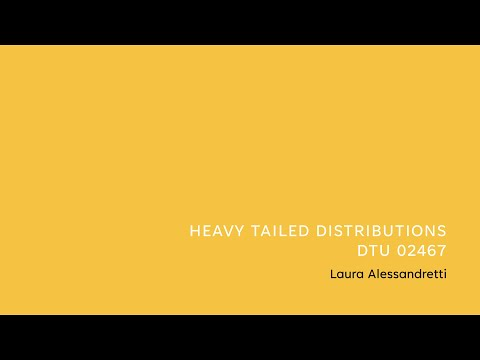

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("S2OZBTKx8_E",width=800, height=450)

In this exercise, we'll delve into the impact of heavy-tailed distributions on the reliability of sample averages as estimators for the population mean, a concept discussed in our lecture.

This idea is rooted in [the Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers), which posits that the average of a sufficiently large sample from a distribution with a finite expected value will converge to the population mean. 
However, this principle can fail with heavy-tailed distributions where the expected value may not be finite or the convergence of the sample mean to the population mean can be slow due to high variance.


>__Exercise 1: Law of large numbers__. 
> 
> 1. Sample __N=10,000__ data points from a [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution) with parameters $\mu = 0 $ and $\sigma = 4$, using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function. Store your data in a numpy array $\mathbf{X}$. 

In [20]:
import numpy as np

X = 4 * np.random.standard_normal(10000)
len(X)

10000

> 2. Create a figure. 
>    - Plot the distribution of the data in $\mathbf{X}$. 

(array([  1.,   0.,   0.,   0.,   2.,   3.,   4.,   9.,  17.,  15.,  33.,
         37.,  57.,  70., 115., 147., 185., 236., 279., 380., 396., 483.,
        493., 579., 574., 636., 618., 596., 577., 516., 517., 443., 404.,
        334., 311., 240., 188., 138., 116.,  72.,  56.,  35.,  22.,  22.,
         12.,  13.,  12.,   3.,   3.,   1.]),
 array([-16.53623167, -15.91289149, -15.28955132, -14.66621114,
        -14.04287097, -13.41953079, -12.79619062, -12.17285044,
        -11.54951027, -10.92617009, -10.30282992,  -9.67948974,
         -9.05614957,  -8.43280939,  -7.80946922,  -7.18612904,
         -6.56278887,  -5.93944869,  -5.31610852,  -4.69276834,
         -4.06942817,  -3.44608799,  -2.82274782,  -2.19940764,
         -1.57606747,  -0.95272729,  -0.32938712,   0.29395306,
          0.91729323,   1.54063341,   2.16397358,   2.78731376,
          3.41065394,   4.03399411,   4.65733429,   5.28067446,
          5.90401464,   6.52735481,   7.15069499,   7.77403516,
          8.397375

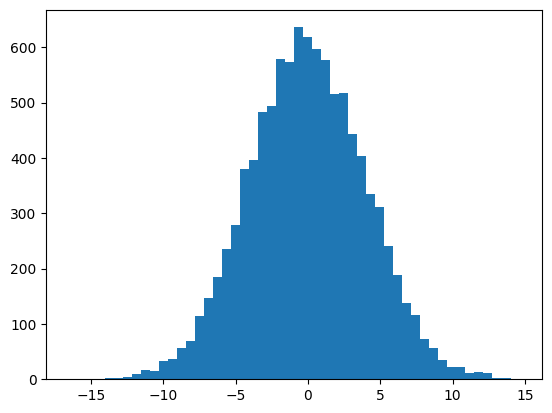

In [21]:
import matplotlib.pyplot as plt
plt.hist(X, bins=50)

> 3. Compute the cumulative average of $\mathbf{X}$ (you achieve this by computing $average(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$  ). Store the result in an array. 

In [22]:
cum_average = [np.mean(X[:i]) for i in range(1, len(X)+1)]

> 4. In a similar way, compute the cumulative standard error of $\mathbf{X}$. __Note__: the standard error of a sample is defined as $ \sigma_{M} = \frac{\sigma}{\sqrt(n)} $, where $\sigma$ is the sample standard deviation and $n$ is the sample size. Store the result in an array. 

In [ ]:
cum_std = [np.std(X[:i])/np.sqrt(i) for i in range(1, len(X)+1)]

> 5. Compute the values of the distribution mean and median using the formulas you can find on the [Wikipedia page of the Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)  

In [24]:
mean = np.mean(X)
median = np.median(X)
mean, median

(np.float64(-0.034870045040912276), np.float64(-0.0948707972442315))

> 6. Create a figure. 
>     - Plot the cumulative average computed in point 3. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>     - Add errorbars to each point in the graph with width equal to the standard error of the mean (the one you computed in point 4). 
>     - Add a horizontal line corresponding to the distribution mean (the one you found in point 5).

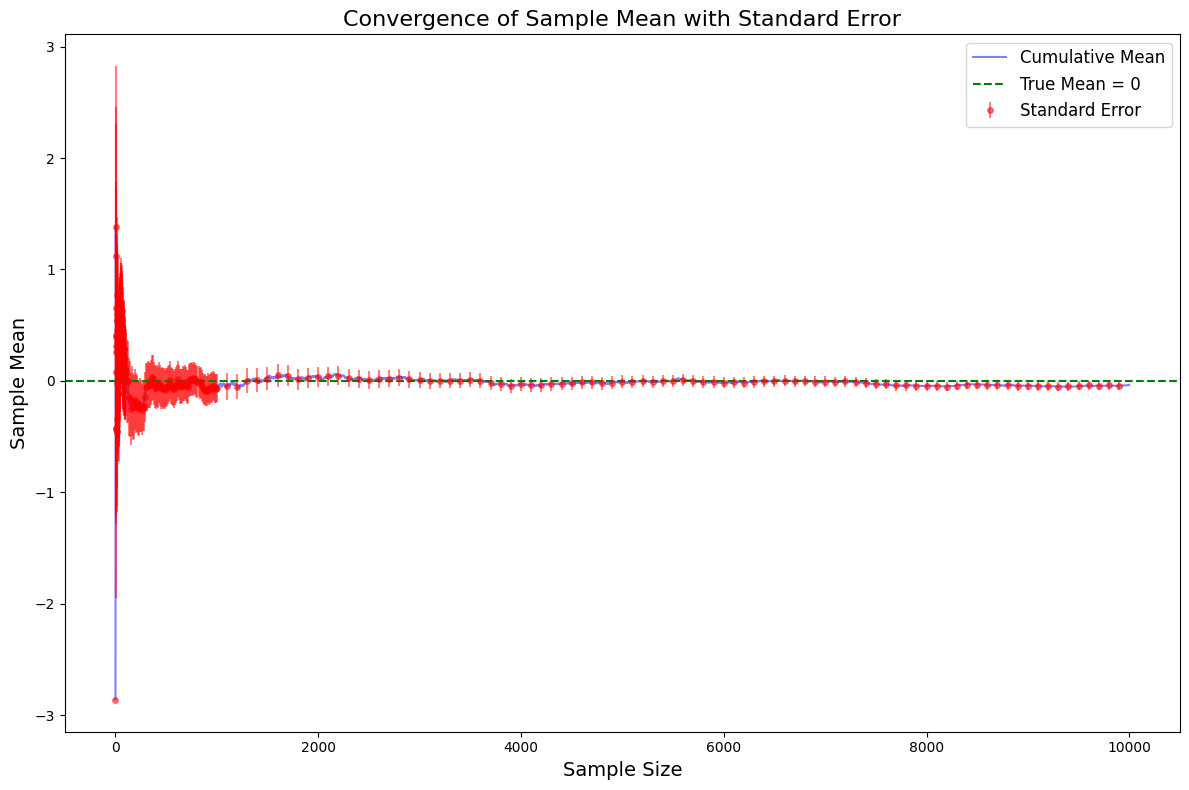

In [27]:
plt.figure(figsize=(12, 8))

# Subsample to make the plot more readable (showing fewer points)
sample_size = np.arange(1, len(X)+1)
subsample_indices = np.concatenate([
    np.arange(1, 100),
    np.arange(100, 1000, 10),
    np.arange(1000, len(X)+1, 100)
])
subsample_indices = np.unique(subsample_indices)
subsample_indices = subsample_indices[subsample_indices < len(X)]

# Plot the cumulative average
plt.plot(sample_size, cum_average, color='blue', alpha=0.5, label='Cumulative Mean')

# Add error bars at subsampled points
plt.errorbar(subsample_indices, 
             [cum_average[i-1] for i in subsample_indices], 
             yerr=[cum_std[i-1] for i in subsample_indices], 
             fmt='o', color='red', alpha=0.5, markersize=4, 
             label='Standard Error')
plt.axhline(y=0, color='green', linestyle='--', 
           label=f'True Mean = {0}')

plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('Sample Mean', fontsize=14)
plt.title('Convergence of Sample Mean with Standard Error', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

> 7.  Compute the cumulative median of $\mathbf{X}$ (you achieve this by computing $median(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$). Store the result in an array. 

In [28]:
cum_median = [np.median(X[:i]) for i in range(1, len(X)+1)]

> 8. Create a figure. 
>    - Plot the cumulative median computed in point 7. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>    - Add a horizontal line corresponding to the distribution median (the one you found in point 5).
>    - _Optional:_ Add errorbars to your median line graph, with width equal to the standard error of the median. You can compute the standard error of the median [via bootstrapping](https://online.stat.psu.edu/stat500/book/export/html/619). 

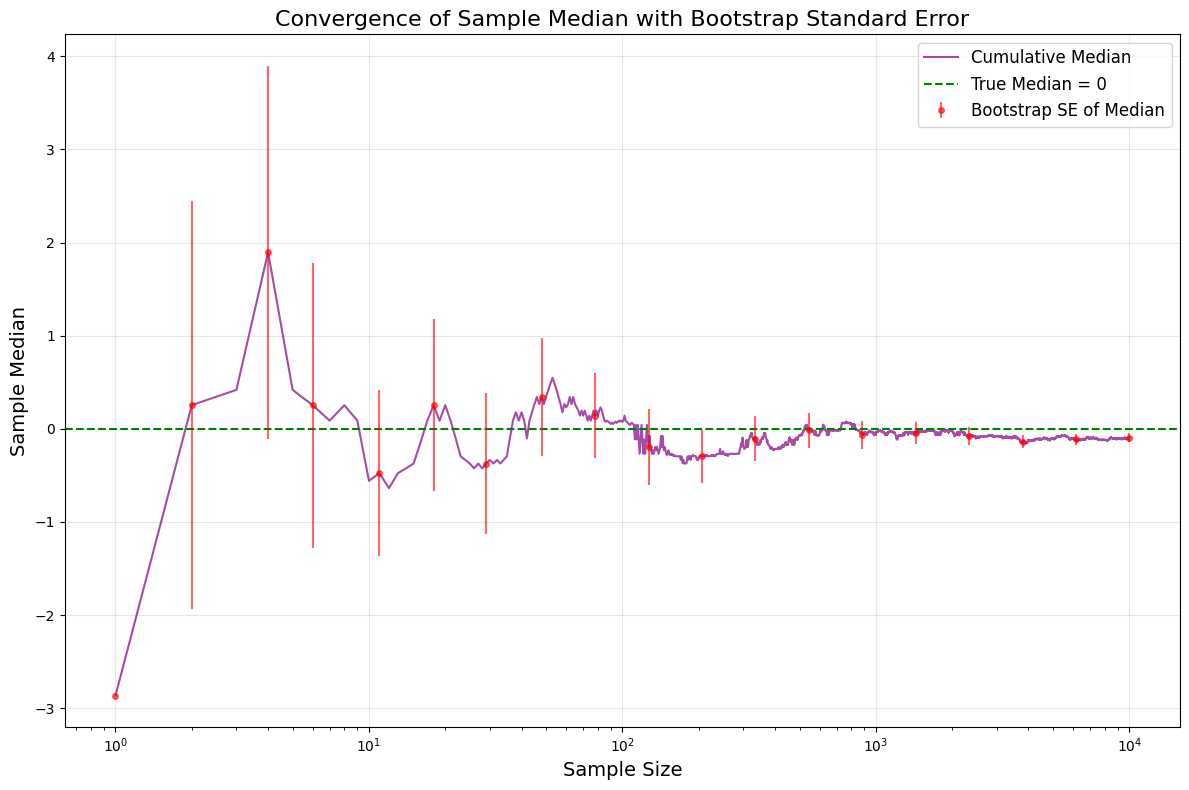

In [29]:
plt.figure(figsize=(12, 8))

# Subsample to make the plot more readable
sample_size = np.arange(1, len(X)+1)
subsample_indices = np.concatenate([
    np.arange(1, 100),
    np.arange(100, 1000, 10),
    np.arange(1000, len(X)+1, 100)
])
subsample_indices = np.unique(subsample_indices)
subsample_indices = subsample_indices[subsample_indices < len(X)]

# Plot the cumulative median
plt.plot(sample_size, cum_median, color='purple', alpha=0.7, label='Cumulative Median')

# Add horizontal line for true median
plt.axhline(y=0, color='green', linestyle='--', 
           label=f'True Median = {0}')

# Optional: Bootstrap to compute standard error of median
# Note: This is computationally intensive, so we'll only do it for selected points
def bootstrap_median_se(data, n_bootstrap=1000):
    """Compute standard error of median via bootstrapping"""
    if len(data) <= 1:
        return np.nan
    
    bootstrap_medians = []
    for _ in range(n_bootstrap):
        # Sample with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_medians.append(np.median(bootstrap_sample))
    
    # Standard deviation of bootstrap medians is the SE
    return np.std(bootstrap_medians, ddof=1)

# Compute SE of median for selected points
selected_indices = np.unique(np.geomspace(1, len(X), 20).astype(int))
median_se = [bootstrap_median_se(X[:i]) for i in selected_indices]

# Add error bars at selected points
plt.errorbar(selected_indices, 
             [cum_median[i-1] for i in selected_indices], 
             yerr=median_se, 
             fmt='o', color='red', alpha=0.6, markersize=4, 
             label='Bootstrap SE of Median')

# Add labels and title
plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('Sample Median', fontsize=14)
plt.title('Convergence of Sample Median with Bootstrap Standard Error', fontsize=16)
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Set x-axis to log scale to better visualize convergence
plt.xscale('log')


# Show the plot
plt.tight_layout()
plt.show()

> 9. Now sample __N = 10,000__ data points from a [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution) with parameters $x_m=1$ and $\alpha=0.5$ using the [`np.random.pareto()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html) function, and store it in a numpy array. (_Optional:_ Write yourself the function to sample from a Pareto distribution using the [_Inverse Transform Sampling method_](https://en.wikipedia.org/wiki/Inverse_transform_sampling))

In [32]:
X_pareto = 1 + np.random.pareto(a=0.5, size=10000)

(array([9.996e+03, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00043915e+00, 5.51860775e+06, 1.10372145e+07, 1.65558213e+07,
        2.20744280e+07, 2.75930348e+07, 3.31116415e+07, 3.86302483e+07,
        4.41488550e+07, 4.96674618e+07, 5.51860685e+07, 6.07046753e+07,
        6.62232820e+07, 7.17418888e+07, 7.72604955e+07, 8.27791023e+07,
        8.82977090e+07, 9.38163158e+07, 9.93349225e+07, 1.04853529e+08,
        1.103721

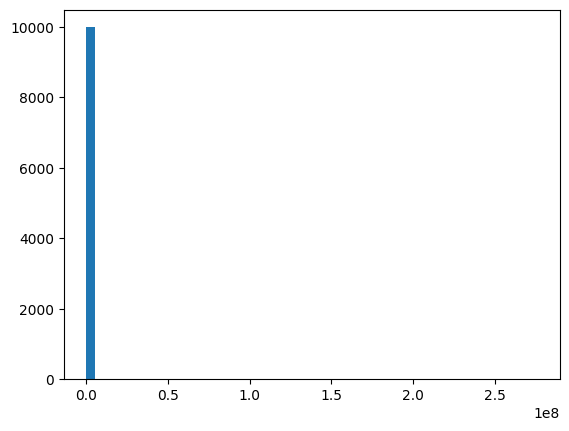

In [35]:
plt.hist(X_pareto, bins=50)

> 10. Repeat points 2 to 8 for the Pareto Distribution sample computed in point 9. 

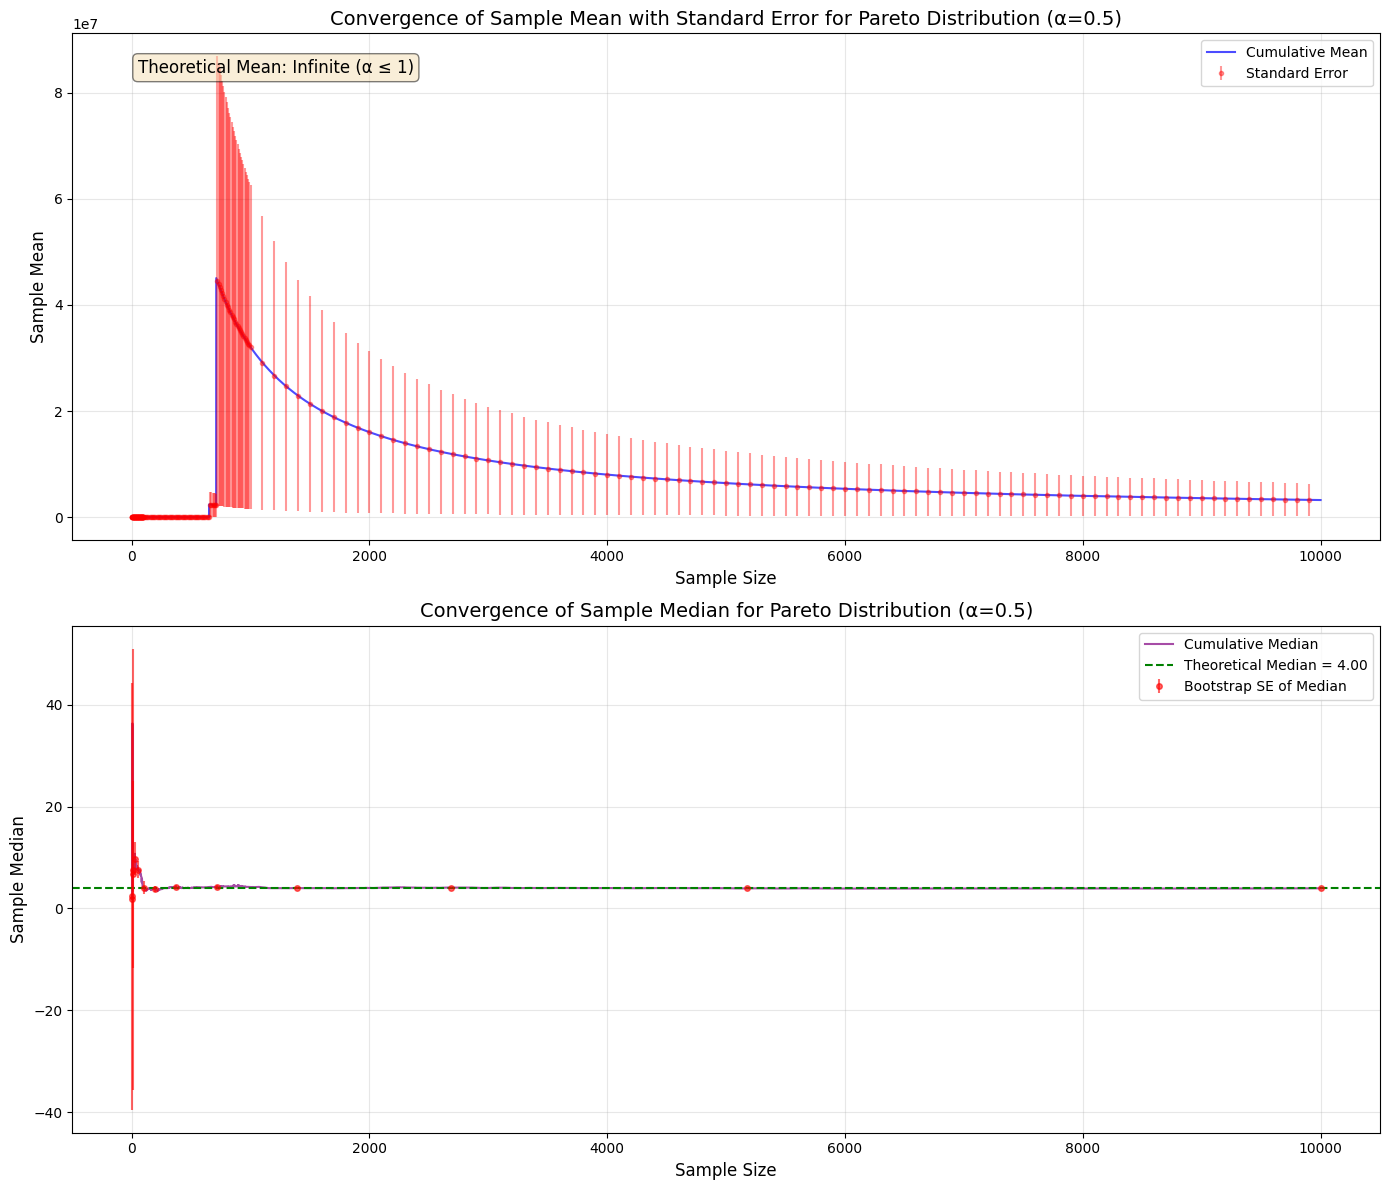

In [63]:
# Parameters
alpha = 0.5
x_m = 1
N = 10000

# Sample from Pareto distribution
X = x_m * (1 + np.random.pareto(alpha, size=N))

# Calculate convergence metrics
cum_average_pareto = [np.mean(X[:i]) for i in range(1, len(X)+1)]
cum_std_pareto = [np.std(X[:i])/np.sqrt(i) for i in range(1, len(X)+1)]
cum_median_pareto = [np.median(X[:i]) for i in range(1, len(X)+1)]

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Sample sizes for plotting
sample_size = np.arange(1, len(X)+1)

# Subsample to make the plot more readable
subsample_indices = np.concatenate([
    np.arange(1, 100),
    np.arange(100, 1000, 10),
    np.arange(1000, len(X)+1, 100)
])
subsample_indices = np.unique(subsample_indices)
subsample_indices = subsample_indices[subsample_indices < len(X)]

# Plot 1: Cumulative Mean with Standard Error
ax1.plot(sample_size, cum_average_pareto, color='blue', alpha=0.7, label='Cumulative Mean')
ax1.errorbar(subsample_indices, 
            [cum_average_pareto[i-1] for i in subsample_indices], 
            yerr=[cum_std_pareto[i-1] for i in subsample_indices], 
            fmt='o', color='red', alpha=0.4, markersize=3, 
            label='Standard Error')

# Determine if theoretical mean exists
theoretical_median = x_m * 2**(1/alpha)  # Formula for Pareto median
if alpha <= 1:
    ax1.text(0.05, 0.95, "Theoretical Mean: Infinite (α ≤ 1)", 
             transform=ax1.transAxes, fontsize=12, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
else:
    theoretical_mean = (alpha * x_m) / (alpha - 1)
    ax1.axhline(y=theoretical_mean, color='green', linestyle='--', 
                label=f'Theoretical Mean = {theoretical_mean:.2f}')

ax1.set_xlabel('Sample Size', fontsize=12)
ax1.set_ylabel('Sample Mean', fontsize=12)
ax1.set_title('Convergence of Sample Mean with Standard Error for Pareto Distribution (α=0.5)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Cumulative Median
ax2.plot(sample_size, cum_median_pareto, color='purple', alpha=0.7, label='Cumulative Median')
ax2.axhline(y=theoretical_median, color='green', linestyle='--', 
            label=f'Theoretical Median = {theoretical_median:.2f}')

# Compute SE of median for selected points
selected_indices = np.unique(np.geomspace(1, len(X), 15).astype(int))
median_se = [bootstrap_median_se(X[:i]) for i in selected_indices]

# Add error bars at selected points
ax2.errorbar(selected_indices, 
             [cum_median_pareto[i-1] for i in selected_indices], 
             yerr=median_se, 
             fmt='o', color='red', alpha=0.6, markersize=4, 
             label='Bootstrap SE of Median')

ax2.set_xlabel('Sample Size', fontsize=12)
ax2.set_ylabel('Sample Median', fontsize=12)
ax2.set_title('Convergence of Sample Median for Pareto Distribution (α=0.5)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

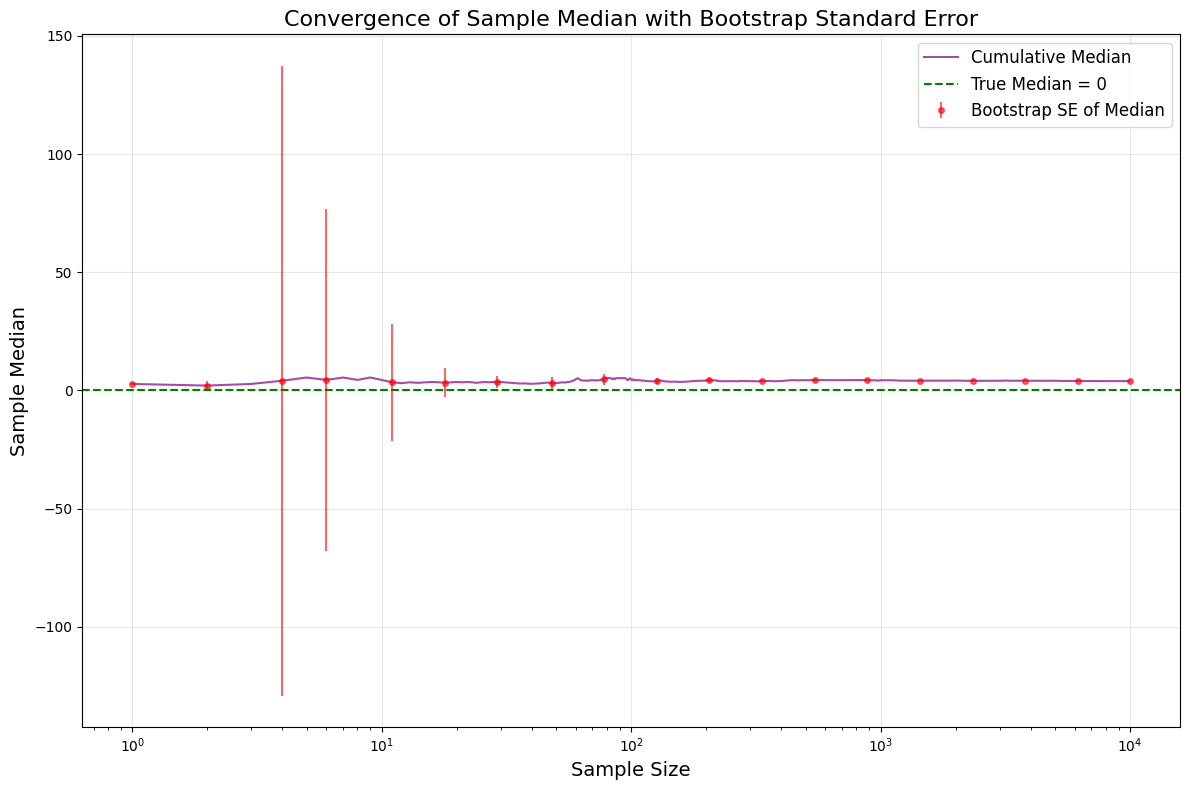

In [41]:
plt.figure(figsize=(12, 8))

# Subsample to make the plot more readable
sample_size = np.arange(1, len(X)+1)
subsample_indices = np.concatenate([
    np.arange(1, 100),
    np.arange(100, 1000, 10),
    np.arange(1000, len(X)+1, 100)
])
subsample_indices = np.unique(subsample_indices)
subsample_indices = subsample_indices[subsample_indices < len(X)]

# Plot the cumulative median
plt.plot(sample_size, cum_median_pareto, color='purple', alpha=0.7, label='Cumulative Median')

# Add horizontal line for true median
plt.axhline(y=0, color='green', linestyle='--', 
           label=f'True Median = {0}')


# Compute SE of median for selected points
selected_indices = np.unique(np.geomspace(1, len(X), 20).astype(int))
median_se = [bootstrap_median_se(X_pareto[:i]) for i in selected_indices]

# Add error bars at selected points
plt.errorbar(selected_indices, 
             [cum_median_pareto[i-1] for i in selected_indices], 
             yerr=median_se, 
             fmt='o', color='red', alpha=0.6, markersize=4, 
             label='Bootstrap SE of Median')

# Add labels and title
plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('Sample Median', fontsize=14)
plt.title('Convergence of Sample Median with Bootstrap Standard Error', fontsize=16)
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Set x-axis to log scale to better visualize convergence
plt.xscale('log')


# Show the plot
plt.tight_layout()
plt.show()

> 11. Now, consider your _paper_ dataset (the one you created in Week 3). First, compute the mean and median number of citations for this population. Then, extract a random sample of __N=10,000__ papers.  

In [56]:
import pandas as pd

papers_df = pd.read_csv("files/combined_papers_filtered.csv")
print(f"Dataset loaded with {len(papers_df)} papers")

citation_column = 'cited_by_count'  # Update this based on your dataset

# 1. Compute population statistics
population_mean = papers_df[citation_column].mean()
population_median = papers_df[citation_column].median()

print(f"Population Statistics:")
print(f"Mean citations: {population_mean:.2f}")
print(f"Median citations: {population_median:.2f}")

Dataset loaded with 43341 papers
Population Statistics:
Mean citations: 121.39
Median citations: 41.00


In [60]:
sample_size = 10000
sample_df = papers_df.sample(n=sample_size, random_state=42)
papers_sample = sample_df[citation_column].to_numpy()
sample_mean = np.mean(papers_sample)
sample_median = np.median(papers_sample)

print(f"\nSample Statistics (N={sample_size}):")
print(f"Sample mean citations: {sample_mean:.2f}")
print(f"Sample median citations: {sample_median:.2f}")


Sample Statistics (N=10000):
Sample mean citations: 127.71
Sample median citations: 41.00


(array([9.866e+03, 8.600e+01, 2.400e+01, 5.000e+00, 5.000e+00, 5.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.100000e+01, 1.079180e+03, 2.147360e+03, 3.215540e+03,
        4.283720e+03, 5.351900e+03, 6.420080e+03, 7.488260e+03,
        8.556440e+03, 9.624620e+03, 1.069280e+04, 1.176098e+04,
        1.282916e+04, 1.389734e+04, 1.496552e+04, 1.603370e+04,
        1.710188e+04, 1.817006e+04, 1.923824e+04, 2.030642e+04,
        2.137460e+04, 2.244278e+04, 2.351096e+04, 2.4579

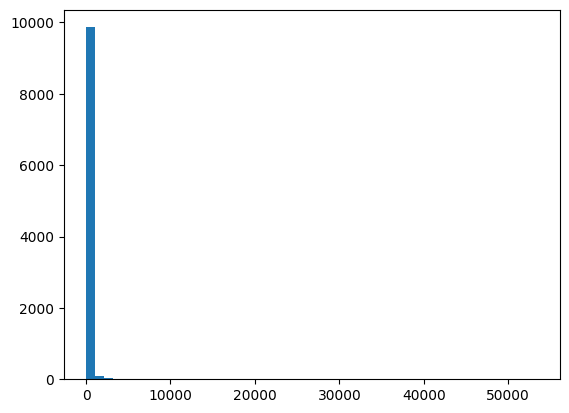

In [61]:
plt.hist(papers_sample, bins=50)

> 12. Repeat points 2,3,4,6,7 and 8 above for the paper citation sample prepared in point 11. 

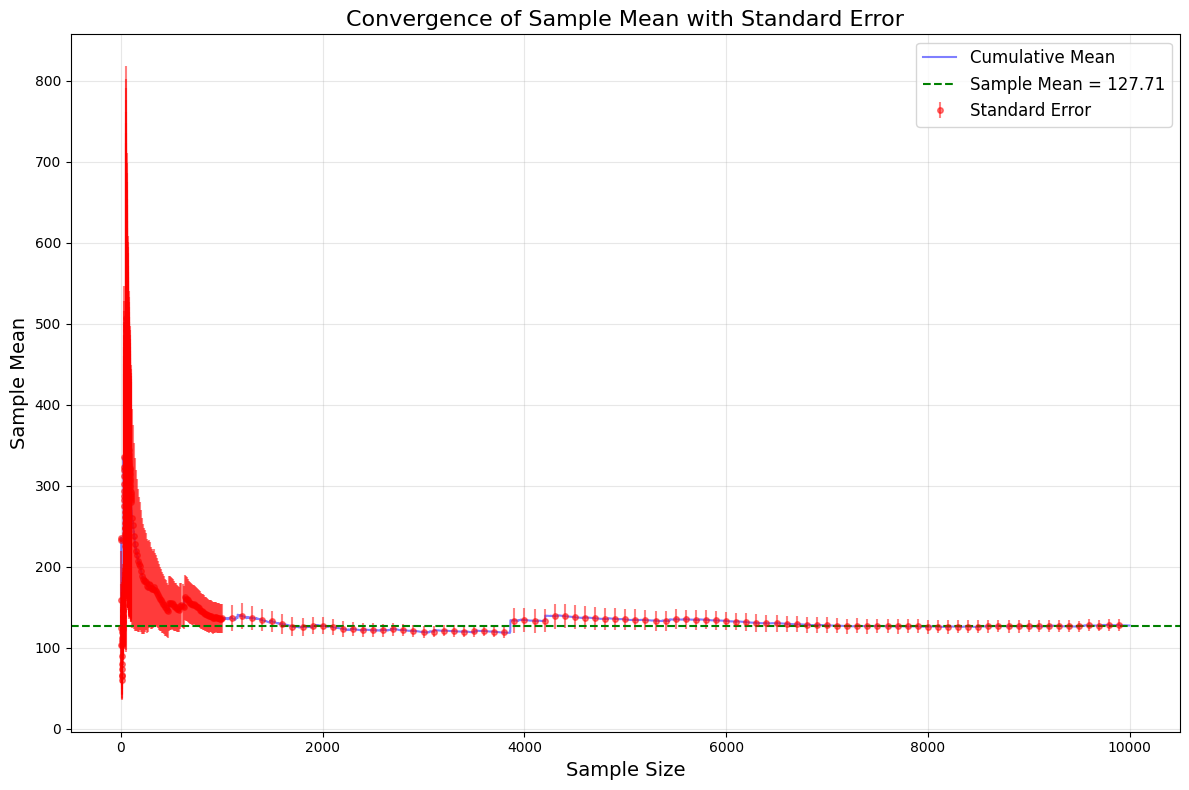

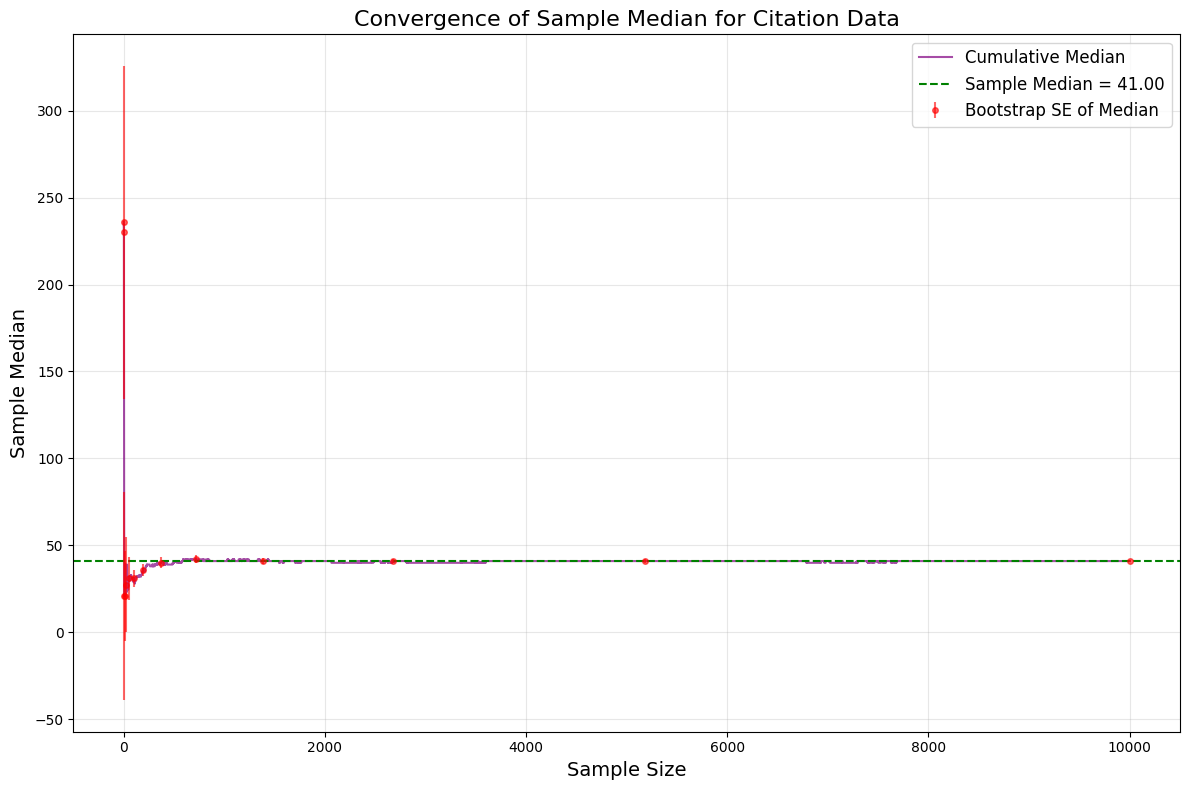

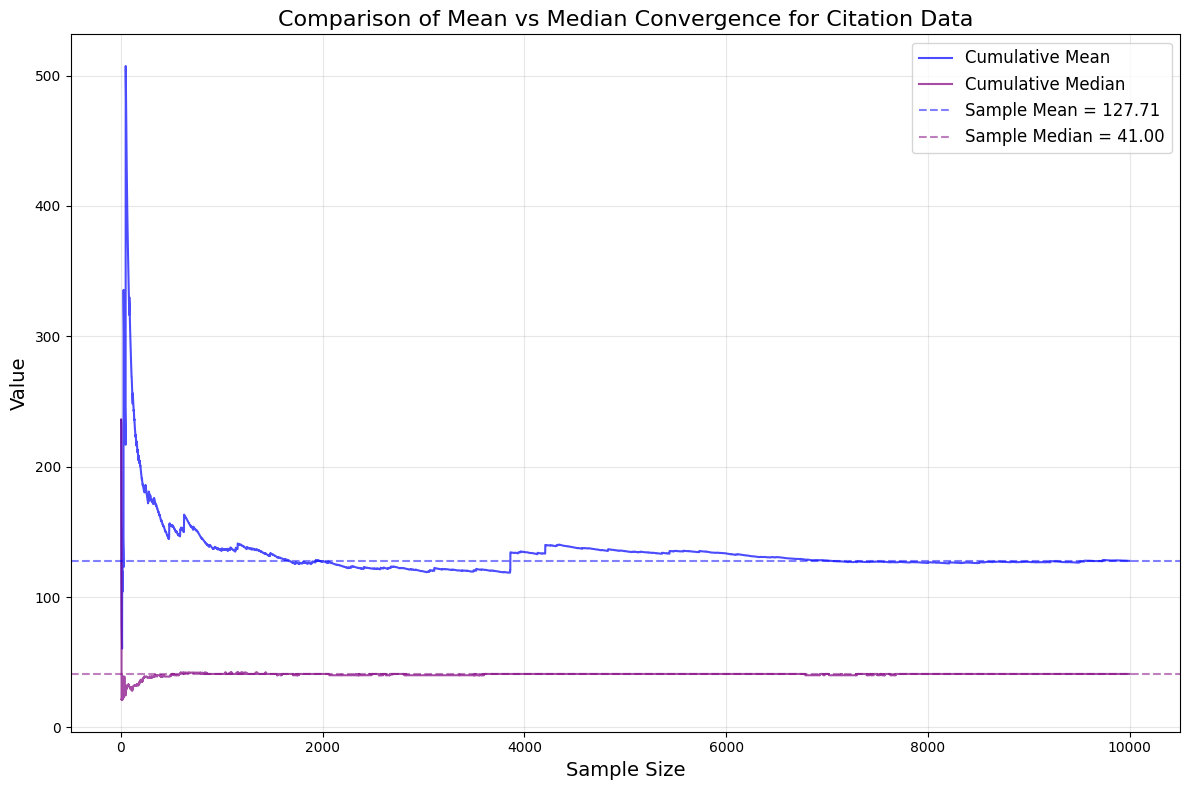

In [62]:
# Create a random sample of papers
n_samples = 10000

# Calculate cumulative statistics
cum_average_papers = [np.mean(papers_sample[:i]) for i in range(1, n_samples+1)]
cum_std_papers = [np.std(papers_sample[:i])/np.sqrt(i) for i in range(1, n_samples+1)]
cum_median_papers = [np.median(papers_sample[:i]) for i in range(1, n_samples+1)]

# Create array for x-axis (sample sizes)
sample_sizes = np.arange(1, n_samples+1)

# Create subsample indices for error bars
subsample_indices = np.concatenate([
    np.arange(1, 100),
    np.arange(100, 1000, 10),
    np.arange(1000, n_samples+1, 100)
])
subsample_indices = np.unique(subsample_indices)
subsample_indices = subsample_indices[subsample_indices < n_samples]

# Create figure for mean convergence
plt.figure(figsize=(12, 8))

# Plot the cumulative average
plt.plot(sample_sizes, cum_average_papers, color='blue', alpha=0.5, label='Cumulative Mean')

# Add error bars at subsampled points
plt.errorbar(subsample_indices,
             [cum_average_papers[i-1] for i in subsample_indices],
             yerr=[cum_std_papers[i-1] for i in subsample_indices],
             fmt='o', color='red', alpha=0.5, markersize=4,
             label='Standard Error')

# Add horizontal line for the overall sample mean
plt.axhline(y=sample_mean, color='green', linestyle='--',
           label=f'Sample Mean = {sample_mean:.2f}')

# Add labels and title
plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('Sample Mean', fontsize=14)
plt.title('Convergence of Sample Mean with Standard Error', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create figure for median convergence
plt.figure(figsize=(12, 8))

# Plot the cumulative median
plt.plot(sample_sizes, cum_median_papers, color='purple', alpha=0.7, label='Cumulative Median')

# Add horizontal line for the overall sample median
plt.axhline(y=sample_median, color='green', linestyle='--',
           label=f'Sample Median = {sample_median:.2f}')

# Optional: Bootstrap to compute standard error of median
def bootstrap_median_se(data, n_bootstrap=1000):
    """Compute standard error of median via bootstrapping"""
    if len(data) <= 1:
        return np.nan
    
    bootstrap_medians = []
    for _ in range(n_bootstrap):
        # Sample with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_medians.append(np.median(bootstrap_sample))
    
    # Standard deviation of bootstrap medians is the SE
    return np.std(bootstrap_medians, ddof=1)

# Compute SE of median for selected points (using fewer points to make it computationally feasible)
selected_indices = np.unique(np.geomspace(1, n_samples, 15).astype(int))
selected_indices = selected_indices[selected_indices > 0]  # Remove 0 if present
median_se = [bootstrap_median_se(papers_sample[:i]) for i in selected_indices]

# Add error bars at selected points
plt.errorbar(selected_indices, 
             [cum_median_papers[i-1] for i in selected_indices], 
             yerr=median_se, 
             fmt='o', color='red', alpha=0.6, markersize=4, 
             label='Bootstrap SE of Median')

# Add labels and title
plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('Sample Median', fontsize=14)
plt.title('Convergence of Sample Median for Citation Data', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Create comparison plot
plt.figure(figsize=(12, 8))
plt.plot(sample_sizes, cum_average_papers, color='blue', alpha=0.7, label='Cumulative Mean')
plt.plot(sample_sizes, cum_median_papers, color='purple', alpha=0.7, label='Cumulative Median')
plt.axhline(y=sample_mean, color='blue', linestyle='--', alpha=0.5, label=f'Sample Mean = {sample_mean:.2f}')
plt.axhline(y=sample_median, color='purple', linestyle='--', alpha=0.5, label=f'Sample Median = {sample_median:.2f}')

plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Comparison of Mean vs Median Convergence for Citation Data', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

13. Reflect on the following questions based on your analysis (__Hint__: I suggest you plot the graphs above multiple times for different random samples, to get a better understanding of what is going on): 
    - Compare the behavior of the cumulative average for Gaussian and Pareto distributions. What differences do you notice, and how do they align with your expectations?

    The cumulative average for Gaussian quickly converted towards 0. The Pareto distribution doesn't converge to a stable value, we can see that even in after 10000 samples the standard error is still high, unlike with the Gaussioan distribution, this was expected since $\alpha < 1$. There are big jumps in the Pareto cummulative mean, which aligns with the characteristics of heavy tailed distributions, where outliers can drastically change the mean
    
    - Assess the cumulative median against the cumulative average across the two distributions. What insights can you gather about the utility of mean versus median in these contexts?

    For the Gaussian distribution, the mean and average looks very similar, where both end up converging towards zero, with low standard error. For the Pareto distribution the median converges to 4, which is expected, since it should converge to a stable value following the formula $x_m\cdot 2^{{\frac{1}{\alpha}}}$, and the standard error of the median is also smaller than for the mean. The mean on the other hand is highly influenced by extreme values, and doesn't converge.

    - Based on your citation count data analysis, what observations can you make? What implications do these observations have?

    The citation count looks a lot like the Gaussian, where both the average and median converges to a stable value. However they don't converge to the same value. This suggests that the distribution is heavy tailed, since that some extreme values raises the mean value by a lot.

    - Conclude with your key takeaways from this exercise.

    Data such as in the citations count follows a heavy tailed distribution, since that it doesn't follow a Gaussian distribution, and some papers will have an extreme value for citation count while the majority of papers will have a citation count in some lower interval


# Part 2 : Empirical properties of real-world social networks

Researchers in Computational Social Science have widely studied the properties of real-world social networks. The very cool thing they found is that many widely different social networks (from face-to-face interactions among classmates, to the Facebook network, to collaboration networks among scientists or actors, etc) present some commonalities. Researchers sometimes refer to those as 'Universalities'.
In the video-lecture below, I will introduce _some_ of the things we know to be true for most real-world social networks. 

>> **_Video Lecture_**. Start by watching the ["Properties of empirical social networks"](https://youtu.be/jHdnehLku54). 


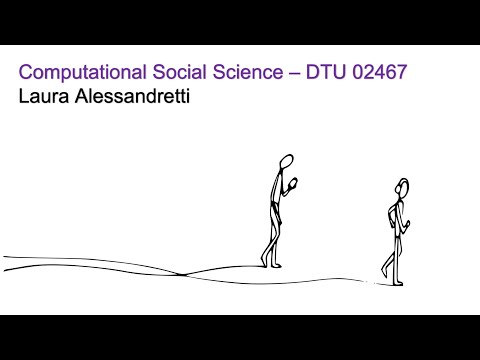

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("jHdnehLku54",width=800, height=450)

> __*Exercise 2:* Did you really read the text? Answer the following questions (no calculations needed) in your Jupyter notebook.__
>
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

In a random network the number of connections for each node would not vary much, however in a real-world network we would see outliers, for example in a friend network, some people would have a very large number of friends, compared with the normal amount.

> * List the four regimes that characterize random networks as a function of ⟨k⟩.

1. Subcritical regime:  
- this is when ⟨k⟩ (average degree of nodes in a network) is less that one.
- Network consists of numerous tiny, isolated components, whose size follows the exponential distribution.
- No giant components exist

2. Critical Point:  
- this is when ⟨k⟩ is 1. This is the transition point between subcritical and supercritical regimes. 
- Average component size diverges
- Components of widely different sizes coexist. 
- Both in the subcritical regime and at the critical point the largest component contains only a vanishing fraction of the total number of nodes in the network.

3. Supercritical Regime:  
- this is when ⟨k⟩ is larger than 1
- Giant component emerges containing a finite fraction of all nodes
- Near the critical point, giant component size scales as NG/N ~ (⟨k⟩-1)
- Small isolated components coexist with the giant component
- Most real networks fall into this regime

4. Connected Regime: ⟨k⟩ > ln(N) (p > ln(N)/N):  
- Giant component absorbs all nodes and components (NG ≈ N)
- Network becomes fully connected with no isolated nodes
- Network is still relatively sparse compared to a complete graph
- The network turns into a complete graph only at ⟨k⟩ = N-1

> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

The random network model predicts that the local clustering coefficient Ci of a node should be:
$$Ci = p = ⟨k⟩/N$$
This equation makes the prediction that the larger N is, the smaller the clustering coefficient should be and that the local clustering coefficient should be independent of the node's degree k. However measurements from real networks reveal that C(k) systematically decreases with degree. This means that in real networks, nodes with higher degrees (more connections) tend to have neighbors that are less interconnected than nodes with fewer connections. This means that real networks systematically deviate from random networks, indicating that real networks are not truly random but have deeper organizational principles.

# Part 3: Properties of the real-world network of Computational Social Scientists


> __Exercise 3: Analyzing Networks through a Random Model__
>

>
> 3.1 _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your [Network Science textbook](https://networksciencebook.com/chapter/3#number-of-links) for guidance. After finding _p_, figure out the average degree (using the given formula).
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above.
>

In [64]:
import networkx as nx
import pickle
%matplotlib inline

researchers_graph = nx.Graph()

edgelist_df = pd.read_csv("files/weighted_edgelist.csv")

# Tilføj vægtede kanter fra edgelisten
researchers_graph.add_weighted_edges_from(edgelist_df.itertuples(index=False, name=None))

# Udskriv grundlæggende information om grafen
print(f"Antal noder: {researchers_graph.number_of_nodes()}")
print(f"Antal kanter: {researchers_graph.number_of_edges()}")

Antal noder: 16190
Antal kanter: 65448


We can use the formula $⟨L⟩ = p\cdot \frac{N(N-1)}{2}$ and isolate p:
$$
p = \frac{2⟨L⟩}{N(N-1)}
$$

We know that the number of edges should be 65448, so $⟨L⟩ = 65448$, and we can find p:

In [67]:
L = researchers_graph.number_of_edges()
p = 2*L / (researchers_graph.number_of_nodes() * (researchers_graph.number_of_nodes() - 1))
k = 2*L / researchers_graph.number_of_nodes()
p, k

(0.0004994126094892593, 8.084990735021618)

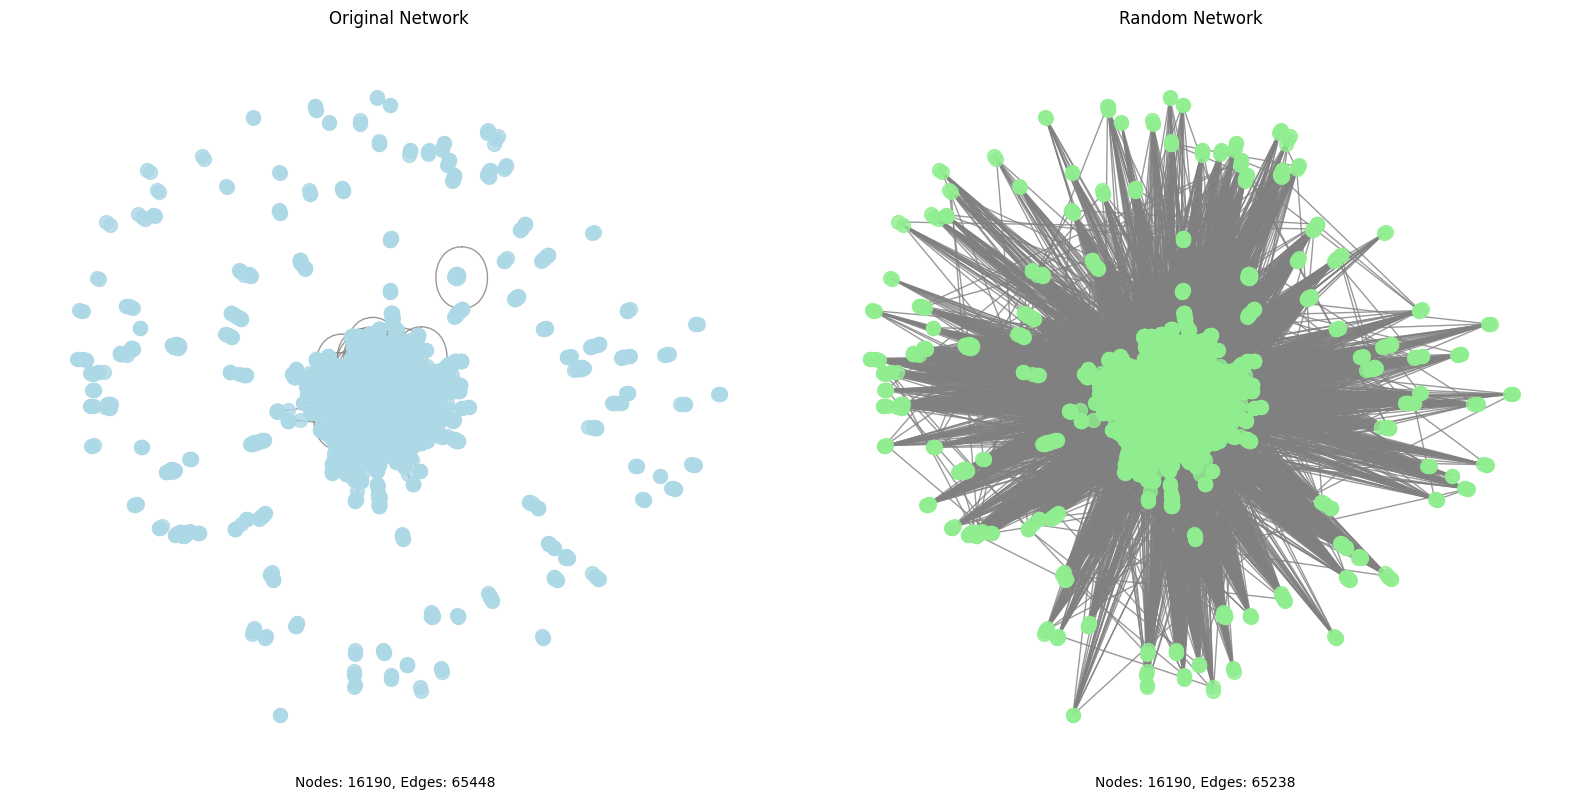

In [85]:
def generate_random_network(graph, p):
    """Generate a random network based on the Erdős-Rényi model."""
    random_graph = nx.Graph()
    random_graph.add_nodes_from(graph.nodes)
    
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            if node1 < node2 and np.random.uniform() < p:
                random_graph.add_edge(node1, node2)
    
    return random_graph

def visualize_networks(original_graph, random_graph, title1="Original Network", title2="Random Network"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Ensure both graphs have the same layout for better comparison
    pos = nx.spring_layout(original_graph, seed=42)
    
    # Plot original network
    nx.draw_networkx(
        original_graph, 
        pos=pos,
        ax=ax1,
        node_size=100,
        node_color='lightblue',
        edge_color='gray',
        alpha=0.8,
        with_labels=False
    )
    ax1.set_title(title1)
    ax1.axis('off')
    
    # Plot random network
    nx.draw_networkx(
        random_graph, 
        pos=pos,  # Using same positions as original
        ax=ax2,
        node_size=100,
        node_color='lightgreen',
        edge_color='gray',
        alpha=0.8,
        with_labels=False
    )
    ax2.set_title(title2)
    ax2.axis('off')
    
    # Add network statistics
    fig.text(0.25, 0.01, f"Nodes: {original_graph.number_of_nodes()}, Edges: {original_graph.number_of_edges()}", ha='center')
    fig.text(0.75, 0.01, f"Nodes: {random_graph.number_of_nodes()}, Edges: {random_graph.number_of_edges()}", ha='center')
    
    plt.tight_layout()
    plt.show()

random_network = generate_random_network(researchers_graph, p)
visualize_networks(researchers_graph, random_network)

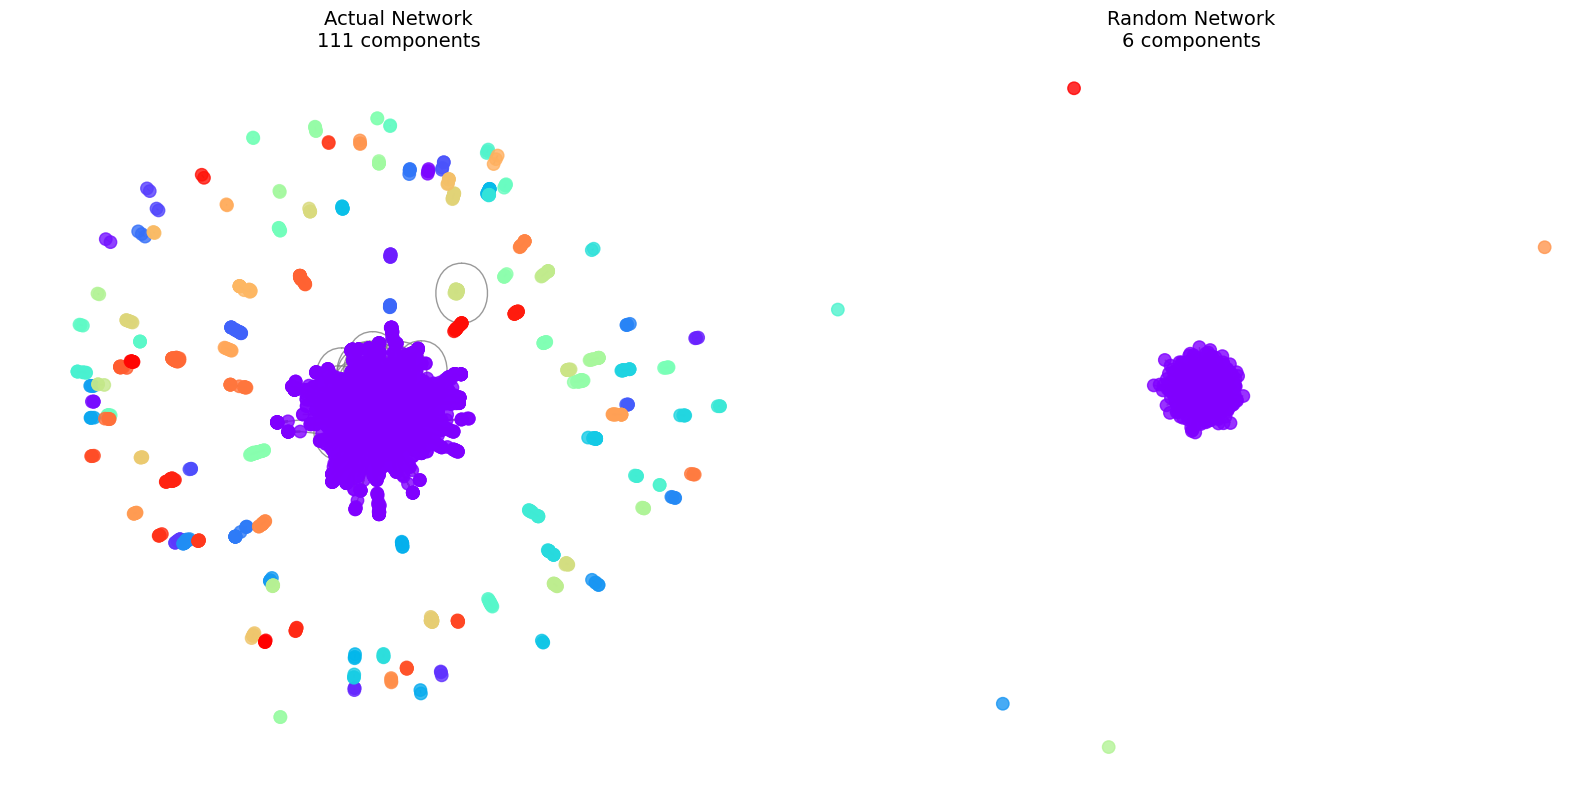

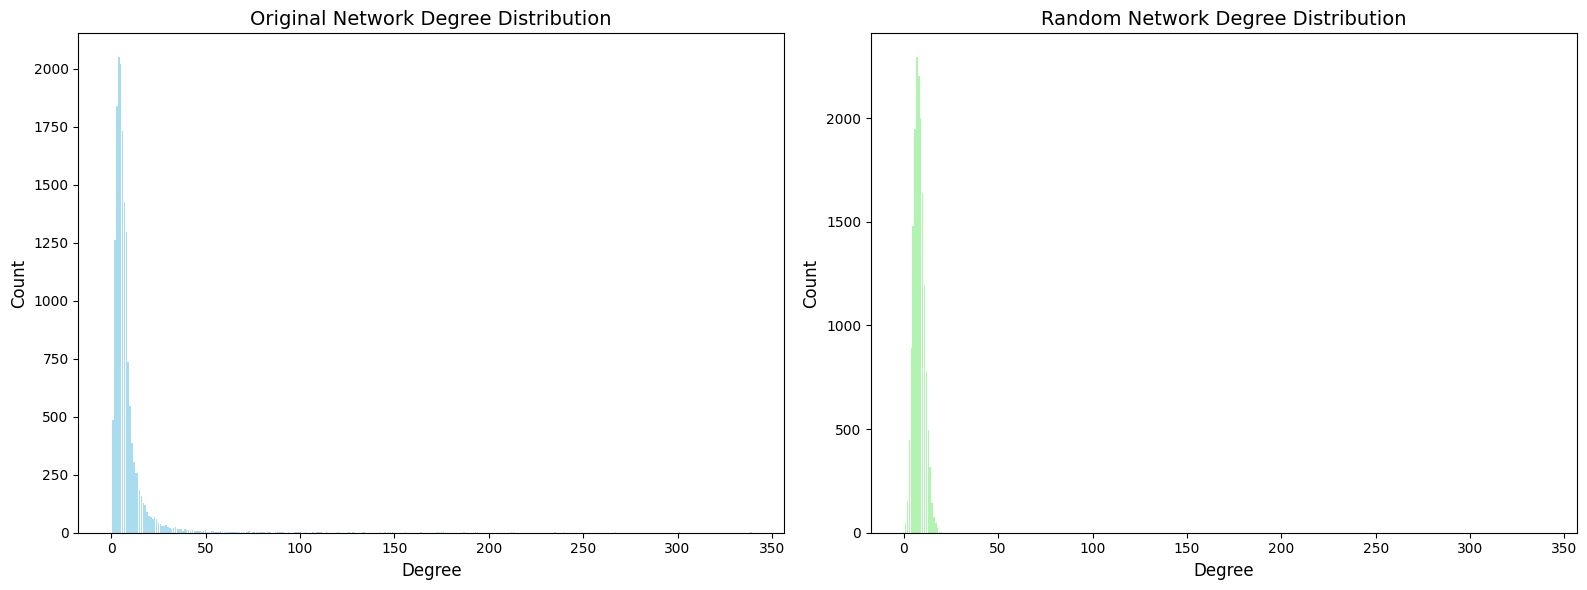

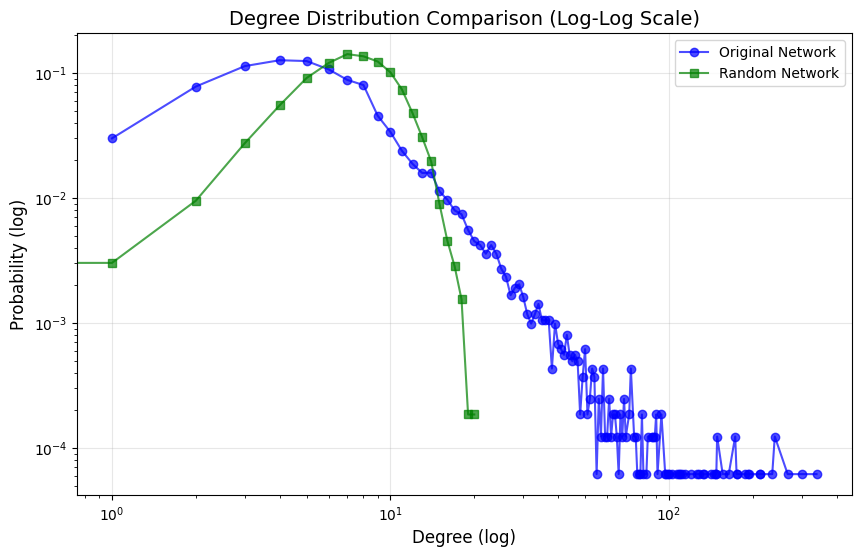

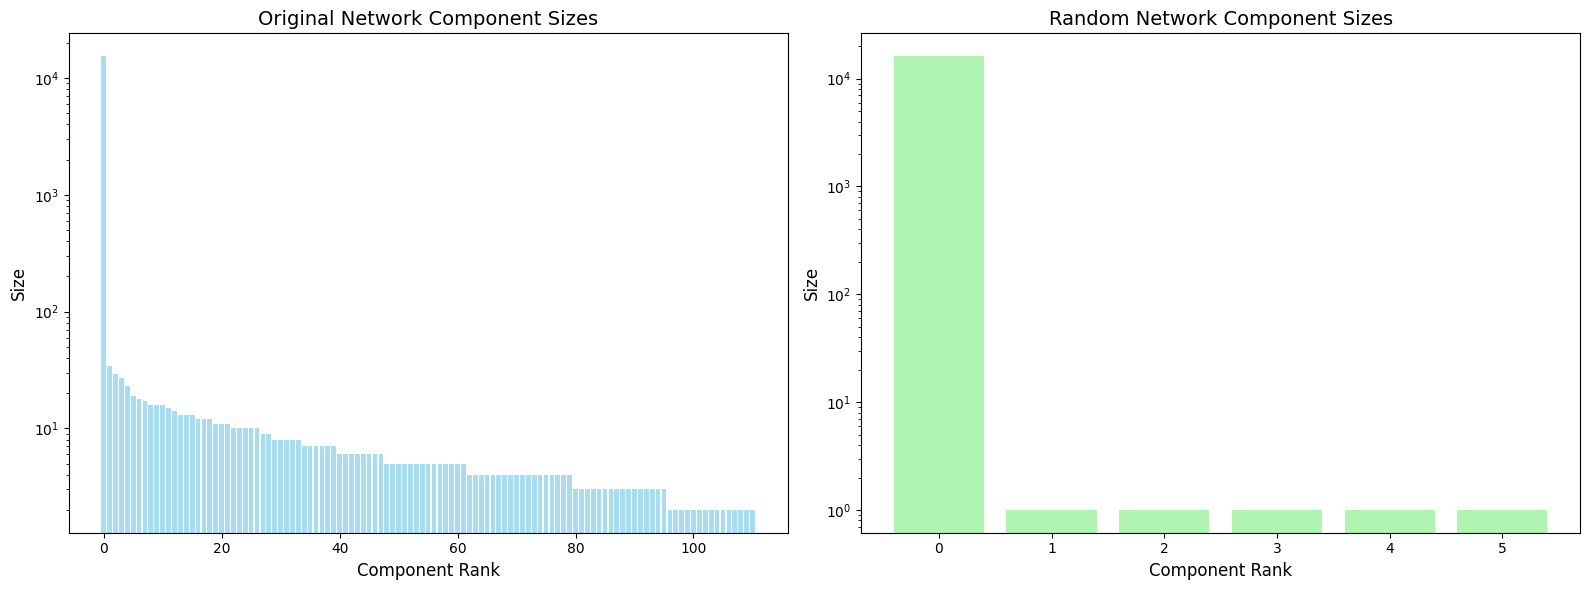

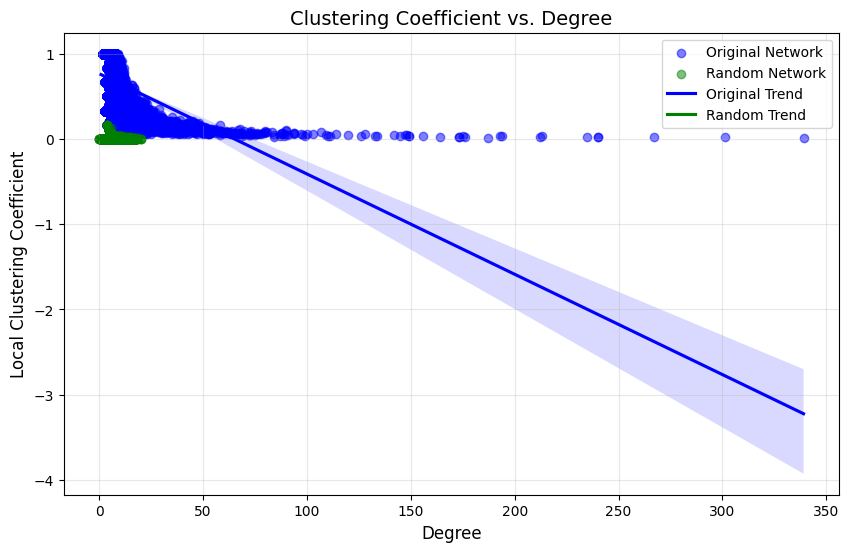

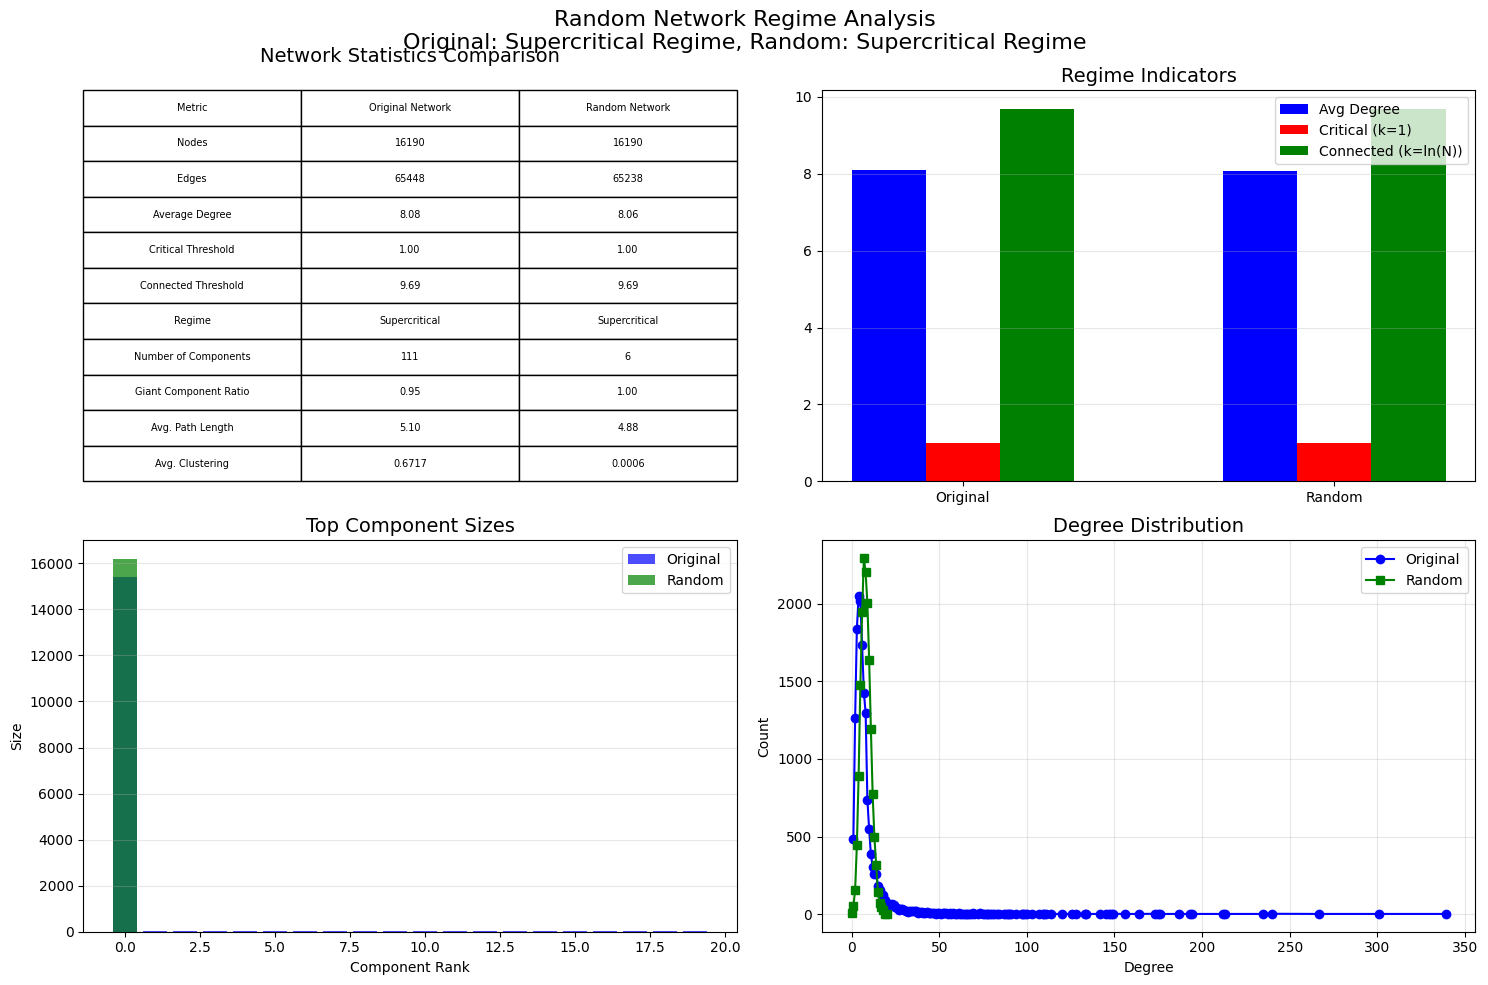

In [86]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def identify_regime(graph):
    """Identify which regime a network falls into based on average degree."""
    n = graph.number_of_nodes()
    avg_degree = 2 * graph.number_of_edges() / n
    critical_threshold = 1.0
    connected_threshold = np.log(n)
    
    if avg_degree < critical_threshold:
        regime = "Subcritical"
    elif avg_degree == critical_threshold:
        regime = "Critical"
    elif avg_degree > critical_threshold and avg_degree < connected_threshold:
        regime = "Supercritical"
    else:
        regime = "Connected"
    
    return regime, avg_degree, critical_threshold, connected_threshold

def component_analysis(graph):
    """Analyze the components of a graph."""
    components = list(nx.connected_components(graph))
    component_sizes = [len(c) for c in components]
    giant_component_size = max(component_sizes) if component_sizes else 0
    giant_component_ratio = giant_component_size / graph.number_of_nodes()
    
    return {
        'total_components': len(components),
        'component_sizes': component_sizes,
        'giant_component_size': giant_component_size,
        'giant_component_ratio': giant_component_ratio,
        'components': components
    }

def plot_network_comparison(original_graph, random_graph, title1="Original Network", title2="Random Network"):
    """Plot networks side by side with component colors."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Get components for coloring
    original_components = list(nx.connected_components(original_graph))
    random_components = list(nx.connected_components(random_graph))
    
    # Generate positions (using spring layout for better visibility)
    pos_original = nx.spring_layout(original_graph, seed=42)
    pos_random = nx.spring_layout(random_graph, seed=42)
    
    # Color mapping for components
    color_map_original = []
    for node in original_graph.nodes():
        for i, comp in enumerate(original_components):
            if node in comp:
                color_map_original.append(i)
                break
    
    color_map_random = []
    for node in random_graph.nodes():
        for i, comp in enumerate(random_components):
            if node in comp:
                color_map_random.append(i)
                break
    
    # Draw networks
    nx.draw_networkx(
        original_graph, 
        pos=pos_original,
        ax=ax1,
        node_size=80,
        node_color=color_map_original, 
        cmap=plt.cm.rainbow,
        edge_color='gray',
        alpha=0.8,
        with_labels=False
    )
    ax1.set_title(f"{title1}\n{len(original_components)} components", fontsize=14)
    ax1.axis('off')
    
    nx.draw_networkx(
        random_graph, 
        pos=pos_random,
        ax=ax2,
        node_size=80,
        node_color=color_map_random,
        cmap=plt.cm.rainbow,
        edge_color='gray',
        alpha=0.8,
        with_labels=False
    )
    ax2.set_title(f"{title2}\n{len(random_components)} components", fontsize=14)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_degree_distributions(original_graph, random_graph):
    """Plot degree distributions for both networks."""
    original_degrees = dict(original_graph.degree())
    random_degrees = dict(random_graph.degree())
    
    original_degree_count = Counter(original_degrees.values())
    random_degree_count = Counter(random_degrees.values())
    
    max_degree = max(max(original_degrees.values()), max(random_degrees.values()))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Original Network Degree Distribution
    degrees = range(max_degree+1)
    counts = [original_degree_count.get(d, 0) for d in degrees]
    ax1.bar(degrees, counts, color='skyblue', alpha=0.7)
    ax1.set_title('Original Network Degree Distribution', fontsize=14)
    ax1.set_xlabel('Degree', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    
    # Random Network Degree Distribution
    counts = [random_degree_count.get(d, 0) for d in degrees]
    ax2.bar(degrees, counts, color='lightgreen', alpha=0.7)
    ax2.set_title('Random Network Degree Distribution', fontsize=14)
    ax2.set_xlabel('Degree', fontsize=12)
    ax2.set_ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Plot the distributions together on log scale for better comparison
    plt.figure(figsize=(10, 6))
    
    original_x = sorted(original_degree_count.keys())
    original_y = [original_degree_count[x]/sum(original_degree_count.values()) for x in original_x]
    
    random_x = sorted(random_degree_count.keys())
    random_y = [random_degree_count[x]/sum(random_degree_count.values()) for x in random_x]
    
    plt.loglog(original_x, original_y, 'o-', color='blue', alpha=0.7, label='Original Network')
    plt.loglog(random_x, random_y, 's-', color='green', alpha=0.7, label='Random Network')
    
    plt.title('Degree Distribution Comparison (Log-Log Scale)', fontsize=14)
    plt.xlabel('Degree (log)', fontsize=12)
    plt.ylabel('Probability (log)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_component_size_distribution(original_graph, random_graph):
    """Plot the distribution of component sizes."""
    original_comp_info = component_analysis(original_graph)
    random_comp_info = component_analysis(random_graph)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Original Network Component Sizes
    sizes = sorted(original_comp_info['component_sizes'], reverse=True)
    ax1.bar(range(len(sizes)), sizes, color='skyblue', alpha=0.7)
    ax1.set_title('Original Network Component Sizes', fontsize=14)
    ax1.set_xlabel('Component Rank', fontsize=12)
    ax1.set_ylabel('Size', fontsize=12)
    ax1.set_yscale('log')
    
    # Random Network Component Sizes
    sizes = sorted(random_comp_info['component_sizes'], reverse=True)
    ax2.bar(range(len(sizes)), sizes, color='lightgreen', alpha=0.7)
    ax2.set_title('Random Network Component Sizes', fontsize=14)
    ax2.set_xlabel('Component Rank', fontsize=12)
    ax2.set_ylabel('Size', fontsize=12)
    ax2.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

def plot_clustering_vs_degree(original_graph, random_graph):
    """Plot clustering coefficient vs. degree for both networks."""
    # Calculate clustering coefficients
    original_clustering = nx.clustering(original_graph)
    random_clustering = nx.clustering(random_graph)
    
    # Get degrees
    original_degrees = dict(original_graph.degree())
    random_degrees = dict(random_graph.degree())
    
    # Prepare data for plotting
    original_data = [(original_degrees[node], coef) for node, coef in original_clustering.items()]
    random_data = [(random_degrees[node], coef) for node, coef in random_clustering.items()]
    
    # Extract x and y values
    original_x = [d[0] for d in original_data]
    original_y = [d[1] for d in original_data]
    random_x = [d[0] for d in random_data]
    random_y = [d[1] for d in random_data]
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(original_x, original_y, color='blue', alpha=0.5, label='Original Network')
    plt.scatter(random_x, random_y, color='green', alpha=0.5, label='Random Network')
    
    # Add trend lines
    if original_x:
        sns.regplot(x=original_x, y=original_y, scatter=False, color='blue', label='Original Trend')
    if random_x:
        sns.regplot(x=random_x, y=random_y, scatter=False, color='green', label='Random Trend')
    
    plt.title('Clustering Coefficient vs. Degree', fontsize=14)
    plt.xlabel('Degree', fontsize=12)
    plt.ylabel('Local Clustering Coefficient', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def visualize_regime_dashboard(original_graph, random_graph):
    """Create a comprehensive dashboard showing regime characteristics."""
    # Identify regimes
    original_regime_info = identify_regime(original_graph)
    random_regime_info = identify_regime(random_graph)
    
    # Component analysis
    original_comp_info = component_analysis(original_graph)
    random_comp_info = component_analysis(random_graph)
    
    # Calculate additional metrics
    original_avg_path_length = calculate_avg_path_length(original_graph)
    random_avg_path_length = calculate_avg_path_length(random_graph)
    original_clustering = nx.average_clustering(original_graph)
    random_clustering = nx.average_clustering(random_graph)
    
    # Create dashboard
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Network info table
    table_data = [
        ['Metric', 'Original Network', 'Random Network'],
        ['Nodes', original_graph.number_of_nodes(), random_graph.number_of_nodes()],
        ['Edges', original_graph.number_of_edges(), random_graph.number_of_edges()],
        ['Average Degree', f"{original_regime_info[1]:.2f}", f"{random_regime_info[1]:.2f}"],
        ['Critical Threshold', f"{original_regime_info[2]:.2f}", f"{random_regime_info[2]:.2f}"],
        ['Connected Threshold', f"{original_regime_info[3]:.2f}", f"{random_regime_info[3]:.2f}"],
        ['Regime', original_regime_info[0], random_regime_info[0]],
        ['Number of Components', original_comp_info['total_components'], random_comp_info['total_components']],
        ['Giant Component Ratio', f"{original_comp_info['giant_component_ratio']:.2f}", f"{random_comp_info['giant_component_ratio']:.2f}"],
        ['Avg. Path Length', f"{original_avg_path_length:.2f}", f"{random_avg_path_length:.2f}"],
        ['Avg. Clustering', f"{original_clustering:.4f}", f"{random_clustering:.4f}"]
    ]
    
    # Hide all axes ticks and spines
    for ax in axes.flat:
        ax.axis('off')
    
    # Create the table
    axes[0, 0].table(
        cellText=table_data,
        colWidths=[0.3, 0.3, 0.3],
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]
    )
    axes[0, 0].set_title('Network Statistics Comparison', fontsize=14, pad=20)
    
    # Regime bar chart
    regime_data = {
        'Original': {
            'Avg Degree': original_regime_info[1],
            'Critical Threshold': original_regime_info[2],
            'Connected Threshold': original_regime_info[3]
        },
        'Random': {
            'Avg Degree': random_regime_info[1],
            'Critical Threshold': random_regime_info[2],
            'Connected Threshold': random_regime_info[3]
        }
    }
    
    # Convert to arrays for plotting
    networks = list(regime_data.keys())
    avg_degrees = [regime_data[net]['Avg Degree'] for net in networks]
    critical_thresholds = [regime_data[net]['Critical Threshold'] for net in networks]
    connected_thresholds = [regime_data[net]['Connected Threshold'] for net in networks]
    
    x = np.arange(len(networks))
    width = 0.2
    
    axes[0, 1].bar(x - width, avg_degrees, width, label='Avg Degree', color='blue')
    axes[0, 1].bar(x, critical_thresholds, width, label='Critical (k=1)', color='red')
    axes[0, 1].bar(x + width, connected_thresholds, width, label='Connected (k=ln(N))', color='green')
    
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(networks)
    axes[0, 1].legend()
    axes[0, 1].set_title('Regime Indicators', fontsize=14)
    axes[0, 1].axis('on')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Component size distributions
    original_sizes = sorted(original_comp_info['component_sizes'], reverse=True)
    random_sizes = sorted(random_comp_info['component_sizes'], reverse=True)
    
    max_comps = max(len(original_sizes), len(random_sizes))
    
    # Only show top 20 components for clarity
    max_comps = min(max_comps, 20)
    
    x_orig = range(min(len(original_sizes), max_comps))
    x_rand = range(min(len(random_sizes), max_comps))
    
    orig_sizes = original_sizes[:max_comps]
    rand_sizes = random_sizes[:max_comps]
    
    axes[1, 0].bar(x_orig, orig_sizes, alpha=0.7, color='blue', label='Original')
    axes[1, 0].bar(x_rand, rand_sizes, alpha=0.7, color='green', label='Random')
    
    axes[1, 0].set_title('Top Component Sizes', fontsize=14)
    axes[1, 0].set_xlabel('Component Rank')
    axes[1, 0].set_ylabel('Size')
    axes[1, 0].legend()
    axes[1, 0].axis('on')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Degree distributions
    original_degrees = dict(original_graph.degree())
    random_degrees = dict(random_graph.degree())
    
    original_degree_count = Counter(original_degrees.values())
    random_degree_count = Counter(random_degrees.values())
    
    orig_x = sorted(original_degree_count.keys())
    orig_y = [original_degree_count[x] for x in orig_x]
    
    rand_x = sorted(random_degree_count.keys())
    rand_y = [random_degree_count[x] for x in rand_x]
    
    axes[1, 1].plot(orig_x, orig_y, 'o-', color='blue', label='Original')
    axes[1, 1].plot(rand_x, rand_y, 's-', color='green', label='Random')
    
    axes[1, 1].set_title('Degree Distribution', fontsize=14)
    axes[1, 1].set_xlabel('Degree')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].legend()
    axes[1, 1].axis('on')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle(f"Random Network Regime Analysis\nOriginal: {original_regime_info[0]} Regime, Random: {random_regime_info[0]} Regime",
                 fontsize=16, y=0.98)
    plt.show()

def calculate_avg_path_length(graph):
    """Calculate average path length, handling disconnected components."""
    # For disconnected graphs, calculate within each component
    if not nx.is_connected(graph):
        components = list(nx.connected_components(graph))
        lengths = []
        nodes_accounted = 0
        
        for comp in components:
            if len(comp) > 1:  # Component with at least 2 nodes
                subgraph = graph.subgraph(comp)
                # Weight by component size
                comp_length = nx.average_shortest_path_length(subgraph)
                lengths.append(comp_length * len(comp))
                nodes_accounted += len(comp)
        
        if nodes_accounted > 0:
            return sum(lengths) / nodes_accounted
        else:
            return 0  # No paths exist
    else:
        return nx.average_shortest_path_length(graph)


# Then create visualizations
plot_network_comparison(researchers_graph, random_network, "Actual Network", "Random Network")
plot_degree_distributions(researchers_graph, random_network)
plot_component_size_distribution(researchers_graph, random_network)
plot_clustering_vs_degree(researchers_graph, random_network)
visualize_regime_dashboard(researchers_graph, random_network)

In [88]:
regime, avg_degree, critical_threshold, connected_threshold = identify_regime(random_network)
regime, avg_degree, critical_threshold, connected_threshold

('Supercritical', 8.05904879555281, 1.0, np.float64(9.69214904667168))

> * Answer the following questions:  
>    - What regime does your random network fall into? Is it above or below the critical threshold?  

It falls into the supercritical regime, the average degree is 8.05, which is above the critical threshold.

>    - According to the textbook, what does the network's structure resemble in this regime?  

- Giant component emerges containing a finite fraction of all nodes
- Small isolated components coexist with the giant component
- Most real networks fall into this regime

>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

- There are a lot more components in the real network, and many more small isolated components spread around the giant component
- The textbook indicates that real networks have higher clustering coefficients than random networks with the same number of nodes and links, which is clearly demonstrated here (0.6717 vs 0.0006).
- The degree distribution discrepancy aligns with Section 3.5's observation that random networks fail to account for highly connected nodes (hubs) that are frequently observed in real networks.
- The number of components differs significantly. While both networks are in the supercritical regime, the random network is closer to the connected regime with fewer isolated components, while the actual network maintains many small isolated components despite having a similar average degree.
- Section 3.9 notes that in real networks, the clustering coefficient typically decreases with node degree, which isn't captured by random networks where clustering is uniform across nodes of all degrees.

> 3.2 _Degree Distribution_: This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.
> * Compute the distribution of degree for the random network using the numpy function ``np.histogram``. Choose bins, and normalization strategies appropriately. **Hint:** Revisit the content from Week 3, Part 3 of the lectures.  
> * Compute the distribution of degree for the Computational Social Scientists network using the numpy function ``np.histogram``. Also here, choose bins and normalization strategies wisely, based on the recommendations from previous lectures.
> * Plot both degree distributions on the same figure using line plots, ensuring the x and y axes are scaled in a way that allows for comparison between the two distributions.
> * Add two vertical lines showing the average degree for the random and the real network. 
> * Answer the following questions: 
>    - Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.
>    - What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties?
>
>
>   
>
> 3.3 _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).
> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html). 
> * Perform the same calculation for the giant component of the random network you constructed in exercise 2.1.
> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only? 

It represents the majority of the network, and the giant component is therefore most interesting.

>   - Why do you think I asked you to consider unweighted edges? 

The small-world phenomenon as described in the textbook relates to the topological structure of the network - how nodes are connected, not how strongly they're connected.

>   - Does the Computational Social Scientists network exhibit the small-world phenomenon? 


Computational Social Scientists Network Analysis:
Total number of nodes: 15420
Total number of edges: 63659
Number of connected components: 1
Giant component size: 15420 nodes (100.00% of total)
Average shortest path length in giant component: 5.2813
Average degree in giant component: 8.2567
Expected path length for random network (ln(N)/ln(<k>)): 4.5681


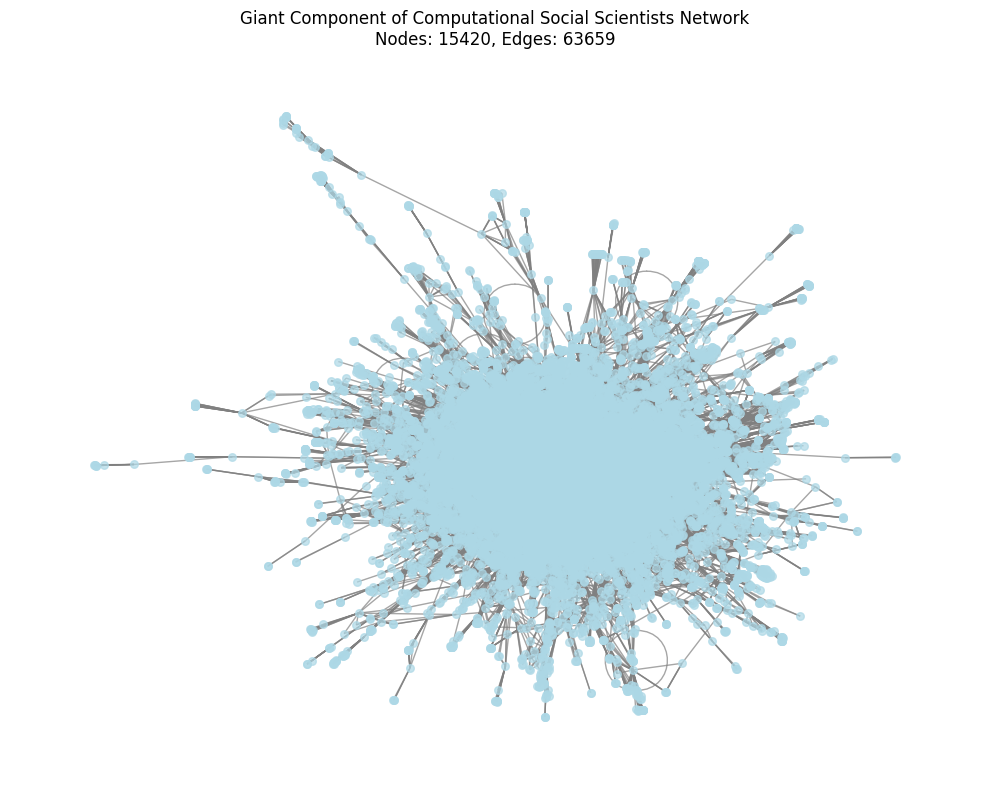


Equivalent Random Network Analysis:
Total number of nodes: 16185
Total number of edges: 65238
Number of connected components: 1
Giant component size: 16185 nodes (100.00% of total)
Average shortest path length in giant component: 4.8765
Average degree in giant component: 8.0615
Expected path length for random network (ln(N)/ln(<k>)): 4.6437


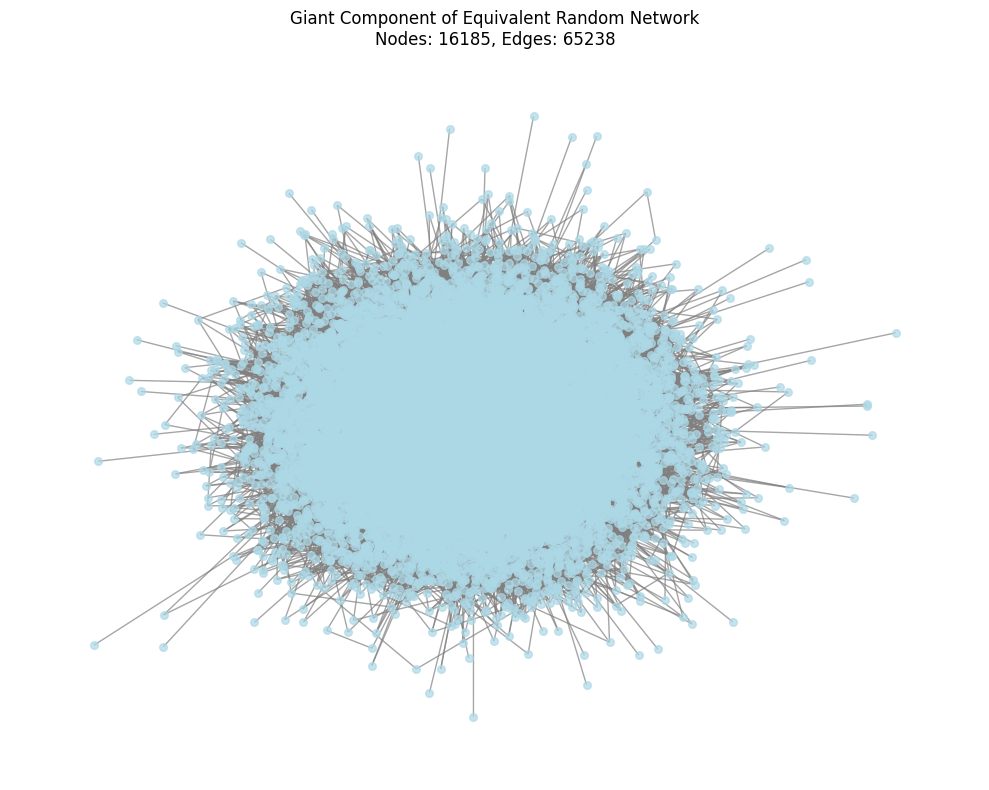

: 

In [89]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to identify the giant component and analyze shortest paths
def analyze_shortest_paths(G, network_name="Network"):
    """
    Identify the giant component and calculate average shortest path length.
    
    Parameters:
    -----------
    G : networkx.Graph
        The network to analyze
    network_name : str
        Name of the network for display purposes
        
    Returns:
    --------
    giant_component : networkx.Graph
        The largest connected component
    avg_path_length : float
        Average shortest path length in the giant component
    """
    # Find all connected components
    components = list(nx.connected_components(G))
    
    # Sort components by size (largest first)
    components = sorted(components, key=len, reverse=True)
    
    # Get the largest component (giant component)
    giant_component_nodes = components[0]
    
    # Create a subgraph of the giant component
    giant_component = G.subgraph(giant_component_nodes)
    
    print(f"\n{network_name} Analysis:")
    print(f"Total number of nodes: {G.number_of_nodes()}")
    print(f"Total number of edges: {G.number_of_edges()}")
    print(f"Number of connected components: {len(components)}")
    print(f"Giant component size: {len(giant_component_nodes)} nodes " +
          f"({100 * len(giant_component_nodes) / G.number_of_nodes():.2f}% of total)")
    
    # Calculate average shortest path length in the giant component
    avg_path_length = nx.average_shortest_path_length(giant_component)
    
    print(f"Average shortest path length in giant component: {avg_path_length:.4f}")
    
    # Calculate what we would expect for a random network
    n = len(giant_component_nodes)
    avg_degree = 2 * giant_component.number_of_edges() / n
    expected_path_length = np.log(n) / np.log(avg_degree)
    
    print(f"Average degree in giant component: {avg_degree:.4f}")
    print(f"Expected path length for random network (ln(N)/ln(<k>)): {expected_path_length:.4f}")
    
    return giant_component, avg_path_length

# Function to visualize the giant component
def visualize_giant_component(giant_component, network_name="Network"):
    """
    Visualize the giant component of a network
    """
    plt.figure(figsize=(10, 8))
    
    # Use a layout algorithm suitable for larger networks
    pos = nx.spring_layout(giant_component, seed=42)
    
    # Draw the network
    nx.draw_networkx(
        giant_component,
        pos=pos,
        node_size=30,
        node_color='lightblue',
        edge_color='gray',
        alpha=0.7,
        with_labels=False
    )
    
    plt.title(f"Giant Component of {network_name}\n"
              f"Nodes: {giant_component.number_of_nodes()}, "
              f"Edges: {giant_component.number_of_edges()}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to compare path length distributions
def compare_path_length_distributions(G1, G2, name1="Actual Network", name2="Random Network"):
    """
    Compare the distribution of shortest path lengths between two networks
    """
    # Get all shortest paths for both networks
    paths1 = dict(nx.all_pairs_shortest_path_length(G1))
    paths2 = dict(nx.all_pairs_shortest_path_length(G2))
    
    # Convert to lists of path lengths
    lengths1 = [length for source in paths1.values() for length in source.values()]
    lengths2 = [length for source in paths2.values() for length in source.values()]
    
    # Create distribution (exclude zero-length paths from self to self)
    lengths1 = [l for l in lengths1 if l > 0]
    lengths2 = [l for l in lengths2 if l > 0]
    
    # Plot the distributions
    plt.figure(figsize=(12, 6))
    
    # Calculate bins based on the max path length
    max_length = max(max(lengths1), max(lengths2))
    bins = np.arange(0.5, max_length + 1.5, 1)
    
    plt.hist(lengths1, bins=bins, alpha=0.7, label=name1, density=True)
    plt.hist(lengths2, bins=bins, alpha=0.7, label=name2, density=True)
    
    plt.xlabel('Shortest Path Length')
    plt.ylabel('Probability')
    plt.title('Shortest Path Length Distribution Comparison')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Function to analyze small-world properties
def analyze_small_world_properties(actual_network, random_network):
    """
    Analyze whether a network exhibits small-world properties
    """
    # Get giant components
    actual_giant = list(nx.connected_components(actual_network))[0]
    random_giant = list(nx.connected_components(random_network))[0]
    
    actual_gc = actual_network.subgraph(actual_giant)
    random_gc = random_network.subgraph(random_giant)
    
    # Calculate clustering coefficients
    actual_clustering = nx.average_clustering(actual_gc)
    random_clustering = nx.average_clustering(random_gc)
    
    # Calculate average path lengths
    actual_path_length = nx.average_shortest_path_length(actual_gc)
    random_path_length = nx.average_shortest_path_length(random_gc)
    
    # Calculate small-world-ness metrics
    clustering_ratio = actual_clustering / random_clustering
    path_length_ratio = actual_path_length / random_path_length
    
    # A network is considered small-world if:
    # 1. It has similar path length as random network
    # 2. It has much higher clustering than random network
    # Small-world-ness index: (C/C_rand) / (L/L_rand) >> 1
    small_world_index = clustering_ratio / path_length_ratio
    
    # Display results
    plt.figure(figsize=(12, 6))
    
    # Create a table
    col_labels = ['Network', 'Avg Path Length', 'Clustering Coefficient']
    cell_text = [
        ['Actual Network', f'{actual_path_length:.4f}', f'{actual_clustering:.4f}'],
        ['Random Network', f'{random_path_length:.4f}', f'{random_clustering:.4f}'],
        ['Ratio (Actual/Random)', f'{path_length_ratio:.4f}', f'{clustering_ratio:.4f}']
    ]
    
    plt.table(cellText=cell_text, colLabels=col_labels, loc='center', cellLoc='center', colWidths=[0.3, 0.3, 0.3])
    plt.axis('off')
    plt.title(f'Small-World Analysis\nSmall-World Index: {small_world_index:.4f}', fontsize=16)
    plt.figtext(0.5, 0.01, 
                "A network is typically considered small-world when it has:\n" +
                "1. Similar average path length to a random network\n" +
                "2. Much higher clustering coefficient than a random network\n" +
                f"Small-World Index = (C/C_rand) / (L/L_rand) = {small_world_index:.4f}" +
                " (values >> 1 indicate small-world properties)",
                ha='center', fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, bottom=0.2)
    plt.show()
    
    return {
        'actual_clustering': actual_clustering,
        'random_clustering': random_clustering,
        'actual_path_length': actual_path_length,
        'random_path_length': random_path_length,
        'clustering_ratio': clustering_ratio,
        'path_length_ratio': path_length_ratio,
        'small_world_index': small_world_index
    }

largest_cc = max(nx.connected_components(random_network), key=len)
G_random = random_network.subgraph(largest_cc).copy()

actual_largest_cc = max(nx.connected_components(researchers_graph), key=len)
G_actual = researchers_graph.subgraph(actual_largest_cc).copy()
# For actual network:
actual_giant, actual_avg_path = analyze_shortest_paths(G_actual, "Computational Social Scientists Network")
visualize_giant_component(actual_giant, "Computational Social Scientists Network")

# For random network:
random_giant, random_avg_path = analyze_shortest_paths(G_random, "Equivalent Random Network")
visualize_giant_component(random_giant, "Equivalent Random Network")

# Compare path length distributions
compare_path_length_distributions(actual_giant, random_giant)

# Analyze small-world properties
small_world_results = analyze_small_world_properties(G_actual, G_random)